# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Statements

In [2]:
# import
import datetime
import numpy as np
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt

# Read Data

In [3]:
route_str = 'B46'

In [4]:
read = f'/content/drive/My Drive/Bus Watcher Spec Project/Projects/Alex Amy + Sanket Shah/Data/Bus/Segment Data - Raw/{route_str}_2021-10-18_v2.csv'

In [5]:
route = pd.read_csv(read).drop(columns='Unnamed: 0')

In [6]:
route['timestamp'] = pd.to_datetime(route['timestamp'])

In [7]:
# sort timestamp
route = route.sort_values('timestamp')

# Clean Data

In [8]:
set(route['progress_rate'])

{'noProgress', 'normalProgress', 'unknown'}

In [9]:
route['progress_rate'].value_counts()

normalProgress    241555
noProgress          6623
unknown             4293
Name: progress_rate, dtype: int64

In [10]:
set(route['progress_status'])

{'layover', nan, 'spooking'}

In [11]:
route['progress_status'].value_counts()

layover     6395
spooking    4293
Name: progress_status, dtype: int64

In [12]:
route = route[route['progress_rate'] == 'normalProgress']

In [13]:
route['passenger_count'].isna().sum()

18823

In [14]:
route['passenger_count'] = route['passenger_count'].fillna(0)

In [15]:
route['next_stop_id'].isna().sum()

37

In [16]:
route = route.dropna(subset=['next_stop_id'])

# EDA

In [17]:
route.head()

,route,timestamp,route_long,direction,service_date,trip_id,gtfs_shape_id,route_short,agency,origin_id,destination_name,next_stop_id,next_stop_eta,next_stop_d_along_route,next_stop_d,lat,lon,bearing,progress_rate,vehicle_id,gtfs_block_id,passenger_count,progress_status,destination_id,unique_trip_id,observation_count,duration
187772,B46,2021-08-01 00:00:56-04:00,MTA NYCT_B46,1,2021-07-31,MTA NYCT_FB_C1-Saturday-138700_B46_446,MTA_B460335,B46,MTA NYCT,MTA_307919,KINGS PLAZA via UTICA,MTA_303690,2021-08-01T00:01:23.499001-04:00,8394.73,64.21,40.646607,-73.929840,275.832550,normalProgress,MTA NYCT_7640,MTA NYCT_FB_C1-Saturday_A_FB_77880_B46-446,24.0,NaN,NaN,MTA NYCT_FB_C1-Saturday-138700_B46_446-2021-07...,1.0,0 days 00:00:00
178011,B46,2021-08-01 00:01:00-04:00,MTA NYCT_B46,0,2021-07-31,MTA NYCT_FB_C1-Saturday-140800_B46_444,MTA_B460336,B46,MTA NYCT,MTA_307920,WILLIAMSBURG BRIDGE PLAZA via UTICA,MTA_307092,2021-08-01T00:01:23.499001-04:00,7941.78,14.62,40.679114,-73.929217,45.000000,normalProgress,MTA NYCT_7312,MTA NYCT_FB_C1-Saturday_A_FB_53400_B46-425,8.0,NaN,NaN,MTA NYCT_FB_C1-Saturday-140800_B46_444-2021-07...,1.0,0 days 00:00:00
94422,B46,2021-08-01 00:01:55-04:00,MTA NYCT_B46,0,2021-07-31,MTA NYCT_FB_C1-Saturday-144000_B46_445,MTA_B460336,B46,MTA NYCT,MTA_307920,WILLIAMSBURG BRIDGE PLAZA via UTICA,MTA_303590,2021-08-01T00:03:34.752998-04:00,676.65,346.46,40.611720,-73.924513,139.398710,normalProgress,MTA NYCT_7649,MTA NYCT_FB_C1-Saturday_A_FB_55680_B46-427,0.0,NaN,NaN,MTA NYCT_FB_C1-Saturday-144000_B46_445-2021-07...,1.0,0 days 00:00:00
187773,B46,2021-08-01 00:01:57-04:00,MTA NYCT_B46,1,2021-07-31,MTA NYCT_FB_C1-Saturday-138700_B46_446,MTA_B460335,B46,MTA NYCT,MTA_307919,KINGS PLAZA via UTICA,MTA_303691,2021-08-01T00:02:22.054001-04:00,8609.88,86.06,40.644874,-73.929649,276.391360,normalProgress,MTA NYCT_7640,MTA NYCT_FB_C1-Saturday_A_FB_77880_B46-446,24.0,NaN,NaN,MTA NYCT_FB_C1-Saturday-138700_B46_446-2021-07...,1.0,0 days 00:00:00
178013,B46,2021-08-01 00:02:01-04:00,MTA NYCT_B46,0,2021-07-31,MTA NYCT_FB_C1-Saturday-140800_B46_444,MTA_B460336,B46,MTA NYCT,MTA_307920,WILLIAMSBURG BRIDGE PLAZA via UTICA,MTA_303624,2021-08-01T00:02:22.054001-04:00,8215.23,53.92,40.681071,-73.928692,101.481995,normalProgress,MTA NYCT_7312,MTA NYCT_FB_C1-Saturday_A_FB_53400_B46-425,8.0,NaN,NaN,MTA NYCT_FB_C1-Saturday-140800_B46_444-2021-07...,1.0,0 days 00:00:00


In [18]:
route.shape

(241518, 27)

In [19]:
num_vehicles = []
for unique_trip_id in set(route['unique_trip_id']):
  num_vehicles.append(len(set(route[route['unique_trip_id'] == unique_trip_id]['vehicle_id'])))
num_vehicles = np.array(num_vehicles)
num_vehicles.max()

1

(array([   0.,    0.,    0.,    0.,    0., 7779.,    0.,    0.,    0.,
           0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

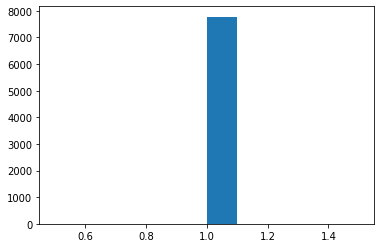

In [20]:
plt.hist(num_vehicles)

## Determine Stop Order

In [21]:
unique_trip_ids = list(set(route['unique_trip_id']))
len(unique_trip_ids)

7779

In [22]:
stop_ids = set(route['next_stop_id'])
len(stop_ids)

106

In [23]:
route_graph = dict.fromkeys(stop_ids)

route = route[route['timestamp'].dt.date == datetime.date(year=2021, month=8, day=2)]

unique_trip_ids = list(set(route['unique_trip_id']))

for unique_trip_id in unique_trip_ids:
  next_stop_ids = list(route[(route['direction'] == 0) & (route['unique_trip_id'] == unique_trip_id)]['next_stop_id'])
  for (i, next_stop_id) in enumerate(next_stop_ids[1:]):
    previous_stop_id = next_stop_ids[i]
    if route_graph[previous_stop_id] == None:
      route_graph[previous_stop_id] = set()
    route_graph[previous_stop_id].add(next_stop_id)

In [24]:
route_graph

{'MTA_300163': {'MTA_303590', 'MTA_303591'},
 'MTA_301092': {'MTA_303158'},
 'MTA_302293': None,
 'MTA_302310': {'MTA_901086'},
 'MTA_303153': {'MTA_303154', 'MTA_307637'},
 'MTA_303154': {'MTA_301092', 'MTA_303156', 'MTA_307637'},
 'MTA_303156': {'MTA_301092', 'MTA_303158'},
 'MTA_303158': {'MTA_303159', 'MTA_303160', 'MTA_303161'},
 'MTA_303159': {'MTA_303160', 'MTA_303161', 'MTA_303162'},
 'MTA_303160': {'MTA_303161', 'MTA_303162', 'MTA_303163'},
 'MTA_303161': {'MTA_303162', 'MTA_303163', 'MTA_303164'},
 'MTA_303162': {'MTA_303163', 'MTA_303164'},
 'MTA_303163': {'MTA_302310', 'MTA_303164'},
 'MTA_303164': {'MTA_302310', 'MTA_901086'},
 'MTA_303170': None,
 'MTA_303172': None,
 'MTA_303173': None,
 'MTA_303175': None,
 'MTA_303178': None,
 'MTA_303180': None,
 'MTA_303590': {'MTA_303591', 'MTA_303592'},
 'MTA_303591': {'MTA_303592', 'MTA_303593'},
 'MTA_303592': {'MTA_300163', 'MTA_303593', 'MTA_303594', 'MTA_303595'},
 'MTA_303593': {'MTA_303594', 'MTA_303595', 'MTA_303596'},
 'MT

In [25]:
route_graph_dropna = {}
for key in route_graph:
  value = route_graph[key]
  if value != None:
    route_graph_dropna[key] = list(value)
  # else:
  #   del route_graph_dropna[key]

In [26]:
route_nxgraph = nx.DiGraph(route_graph_dropna)

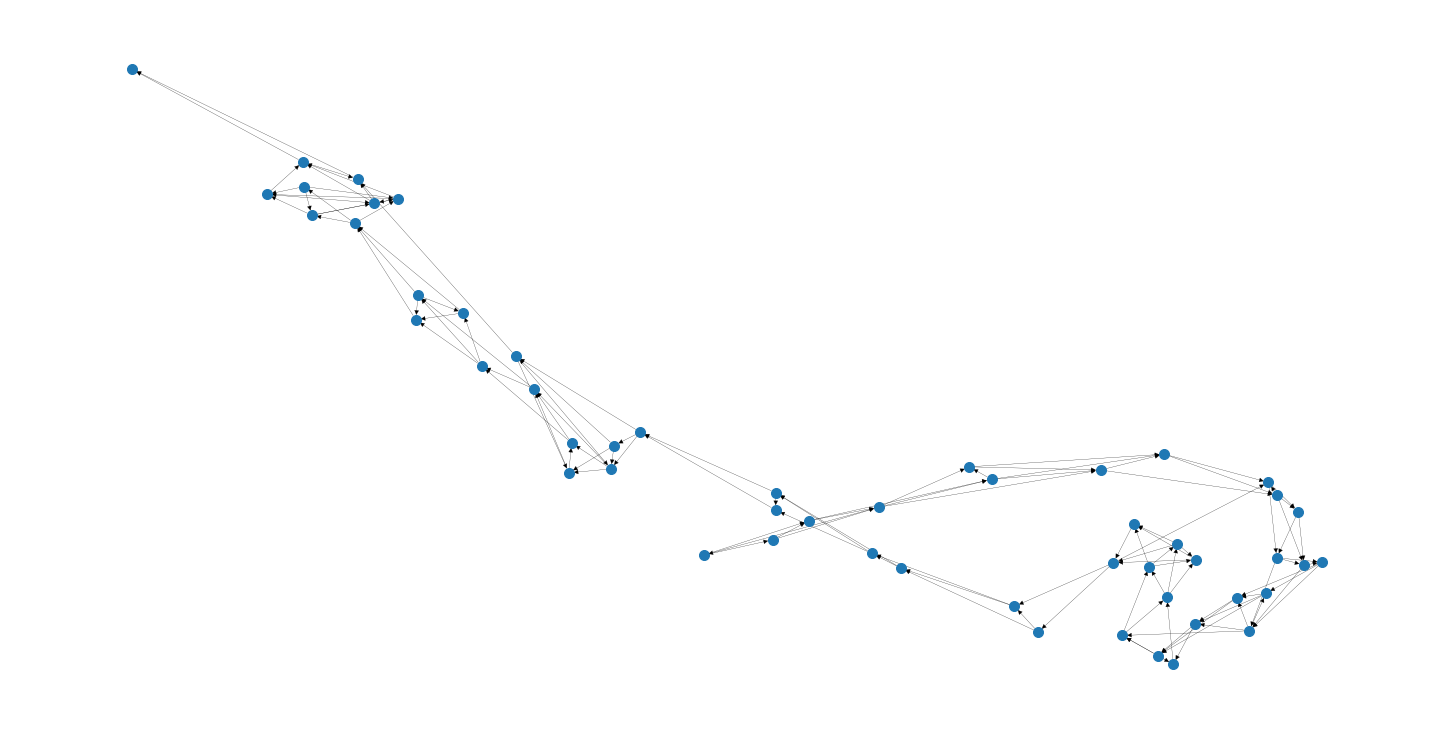

In [31]:
plt.figure(figsize=(20, 10))
nx.draw(route_nxgraph, node_size=100, width=0.25)
plt.draw()
plt.show()